<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/0116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import SelectKBest, chi2 

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/파이썬/train(building).csv", encoding = "cp949")
df_train = pd.DataFrame(df)
df_train

In [ ]:
pd.DataFrame(df_train.isnull().sum())

In [62]:
df_train.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN'],
      dtype='object')

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/파이썬/test(building).csv", encoding = "cp949")
df_test = pd.DataFrame(df_test)
df_test

In [211]:
df_test.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN'],
      dtype='object')

In [179]:
df_train = df_train[['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN','Y_LABEL']]

In [ ]:
df_train

In [212]:
df_train.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
ANONYMOUS_2            0
AG                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
MN                     0
MO                     0
NI                     0
PQINDEX                0
TI                     0
V                      0
V40                    0
ZN                     0
Y_LABEL                0
dtype: int64

In [180]:
Y_train = df_train["Y_LABEL"]
X_train = df_train.drop(["Y_LABEL"],axis = 1)

In [ ]:
Y_train

In [181]:
X_test = df_test

In [214]:
Y_test = pd.read_csv("/content/drive/MyDrive/파이썬/sample_submission(building).csv", encoding = "cp949")
Y_test = pd.DataFrame(Y_test)
Y_test

,ID,Y_LABEL
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
6036,TEST_6036,0
6037,TEST_6037,0
6038,TEST_6038,0
6039,TEST_6039,0


In [183]:
X_train = X_train.drop(["ID", "COMPONENT_ARBITRARY"],axis = 1)

In [184]:
X_test

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


In [185]:
X_test = X_test.drop(["ID", "COMPONENT_ARBITRARY"],axis = 1)

In [186]:
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [187]:
selector = SelectFromModel(RandomForestClassifier(n_estimators= 100, random_state=0), threshold= "median")
selector.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                threshold='median')

In [188]:
score = pd.DataFrame()
#score["Chi2"] = selector.scores_
#score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

,support,attribute
0,True,ANONYMOUS_1
1,True,YEAR
2,True,ANONYMOUS_2
6,True,CU
7,True,FE
10,True,MO
12,True,PQINDEX
15,True,V40
16,True,ZN


In [135]:
X_train

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.000000,75
1,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.000000,652
2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.600000,412
3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.300000,7
4,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.100000,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25779,2629,2013,200,0,0,0,7,4,0.0,0,0,0,16,0,0,60.304718,500
25780,1691,2011,200,0,0,3,0,148,0.0,1,0,0,151,0,0,134.857076,10
25781,2012,2009,200,0,0,2,25,142,0.0,2,0,1,196,0,0,150.913051,24
25782,6015,2015,200,0,0,0,0,5,0.0,0,12,0,6,0,0,128.044593,1227


In [173]:
X_test

array([[ 0.58934425,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.66806502,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.91954688,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.08638054,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.16510131,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58934425,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [189]:
X_train = X_train[["ANONYMOUS_1", "YEAR", "ANONYMOUS_2", "CU","FE", "MO", "PQINDEX", "V40", "ZN"]]

In [98]:
X_train

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.000000,75
1,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.000000,652
2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.600000,412
3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.300000,7
4,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.100000,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25779,2629,2013,200,0,0,0,7,4,0.0,0,0,0,16,0,0,60.304718,500
25780,1691,2011,200,0,0,3,0,148,0.0,1,0,0,151,0,0,134.857076,10
25781,2012,2009,200,0,0,2,25,142,0.0,2,0,1,196,0,0,150.913051,24
25782,6015,2015,200,0,0,0,0,5,0.0,0,12,0,6,0,0,128.044593,1227


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [190]:
X_test = X_test[["ANONYMOUS_1", "YEAR", "ANONYMOUS_2", "CU","FE", "MO", "PQINDEX", "V40", "ZN"]]


In [140]:
X_test.describe()

,ANONYMOUS_1,YEAR,ANONYMOUS_2,CU,FE,MO,PQINDEX,V40,ZN
count,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000
mean,3199.140871,2013.656514,392.669922,37.397285,198.615295,25.042212,475.091210,110.495135,581.186393
std,4834.849930,3.976759,563.705290,153.922102,690.985612,62.245538,1812.652841,45.381679,530.799040
min,1000.000000,2007.000000,200.000000,0.000000,0.000000,0.000000,0.000000,17.900000,1.000000
25%,1667.000000,2010.000000,200.000000,1.000000,15.000000,0.000000,12.000000,73.000000,38.000000
50%,2271.000000,2014.000000,200.000000,4.000000,41.000000,1.000000,30.000000,112.100000,489.000000
75%,3842.000000,2017.000000,417.000000,17.000000,143.000000,8.000000,173.000000,138.200000,1115.000000
max,239570.000000,2022.000000,9650.000000,4113.000000,30407.000000,765.000000,48976.000000,388.400000,1932.000000


In [191]:
cg = ["YEAR"]
num= ["ANONYMOUS_1", "ANONYMOUS_2", "CU","FE", "MO", "PQINDEX", "V40", "ZN"]

In [ ]:
X_test

In [160]:
X_train

array([[-0.51138323,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.14462863,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55102151,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.04258561,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55102151,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55102151,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
Y_test

In [192]:
ct = ColumnTransformer([("scaling", StandardScaler(), num), ("onehot", OneHotEncoder(sparse=False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
#ct.fit(X_test)
X_test = ct.transform(X_test)

In [ ]:
X_test

In [215]:
Y_test = Y_test["Y_LABEL"]

In [216]:
Y_test

0       0
1       0
2       0
3       0
4       0
       ..
6036    0
6037    0
6038    0
6039    0
6040    0
Name: Y_LABEL, Length: 6041, dtype: int64

In [199]:
logit = LogisticRegression(C = 1, random_state = 0)

logit.fit(X_train, Y_train)
Y_pred = logit.predict(X_test)

print("R2 : {:.3f}" .format(logit.score(X_train, Y_train)))

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print(logit.intercept_)
print(logit.coef_)                       
     

R2 : 0.634
              precision    recall  f1-score   support

           0       1.00      0.58      0.73      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.58      6041
   macro avg       0.50      0.29      0.37      6041
weighted avg       1.00      0.58      0.73      6041

[-0.22811471]
[[ 0.50465137 -0.12203755 -0.04218425  0.13263458 -0.04537678 -0.00973344
   0.01583053 -0.02345084  0.48440598  0.56408076  1.09997504  0.9429471
   0.48183839  0.54841814  0.2982358   0.06785135 -0.02209384 -0.39299987
  -0.48602102 -0.64173234 -0.73479326 -0.51163966 -1.10431642 -0.81304134]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")
knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
print("accuracy : {:.3f}".format(knn_model.score(X_train, Y_train)))
print(classification_report(Y_test,Y_pred))

accuracy : 0.802
              precision    recall  f1-score   support

           0       1.00      0.66      0.79      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.66      6041
   macro avg       0.50      0.33      0.40      6041
weighted avg       1.00      0.66      0.79      6041



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [201]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
DT_model.fit(X_train, Y_train)

Y_pred = DT_model.predict(X_test)
print("accuracy : {:.3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.626
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.53      6041
   macro avg       0.50      0.26      0.35      6041
weighted avg       1.00      0.53      0.69      6041



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [203]:
#5. 모델링
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=0, alpha = 0.001, hidden_layer_sizes = [50])
## 5-1. 모형학습
nn_model.fit(X_train, Y_train)

#6. 예측
Y_pred = nn_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [204]:
#7. 결과값 보고
print("Y 예측값 \n", Y_pred)
print("accuracy(train) : {:.3f}".format(nn_model.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

Y 예측값 
 [0 1 1 ... 0 1 0]
accuracy(train) : 0.732
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.66      6041
   macro avg       0.50      0.33      0.40      6041
weighted avg       1.00      0.66      0.80      6041



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [210]:
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

#5.시드값 설정 : 시작점
np.random.seed(0)
tf.random.set_seed(0)

#6. 모형생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=7, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

#7. 모형 학습
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, 
                    batch_size = 64, verbose = 2)

Epoch 1/100


ValueError: ignored

NameError: ignored

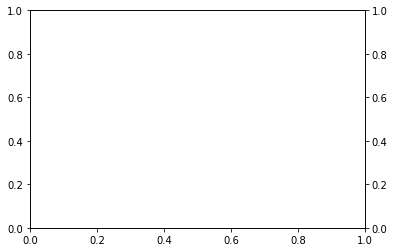

In [209]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#loss(오차) 그리기
loss_ax.plot(history.history["loss"], "y", label = "train loss")
loss_ax.plot(history.history["val_loss"], "r", label = "val loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc = "lower right")

#accuracy(정확도) 그리기
acc_ax.plot(history.history["accuracy"], "b", label = "train acc")
acc_ax.plot(history.history["val_accuracy"], "g", label = "val acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc = "upper right")

plt.show()